## Q1

In [1]:
!pip install pydicom


In [20]:
from pydicom import dcmread
import matplotlib.pyplot as plt
from PIL import Image

In [21]:
with open('case3a_001.dcm', 'rb') as infile: #reading .dcm file
    ds = dcmread(infile)

Patient Name:  Fall 3
Modality:  MR
Manufacturer:  Philips Medical Systems


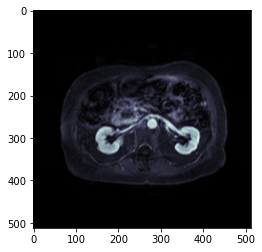

In [22]:
print('Patient Name: ', ds.PatientName)
print('Modality: ', ds.Modality)
print('Manufacturer: ', ds.Manufacturer)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) #showing image

## Q2

In [23]:
from torchvision import models
import torch
from torchvision import transforms
from PIL import Image

In [24]:
resnet18 = models.resnet18(pretrained=True) #model loading
resnet18.eval() #set the nodel in eval mode

#image transformations
transform = transforms.Compose([           
transforms.Resize(256),         
transforms.CenterCrop(224),               
transforms.ToTensor(),                    
transforms.Normalize(                      
mean=[0.485, 0.456, 0.406],                
std=[0.229, 0.224, 0.225])
])

with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

In [25]:
def get_class(img):
    img = Image.open(img)
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out = resnet18(batch_t)
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    print('Class: ', classes[index[0]], '  ', 'Confidence: ', "{:.2f}".format(percentage[index[0]].item())+'%')

In [26]:
get_class('bird.jpg')
get_class('animal.jpg')

Class:  kite    Confidence:  72.31%
Class:  pug    Confidence:  96.34%
